In [1]:
# وارد کردن کتابخانه‌های لازم
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

Imports required libraries for data handling, modeling, metrics, plotting, timing, and warning suppression.

Shape of X: (1797, 64)
Shape of y: (1797,)
Classes: [0 1 2 3 4 5 6 7 8 9]


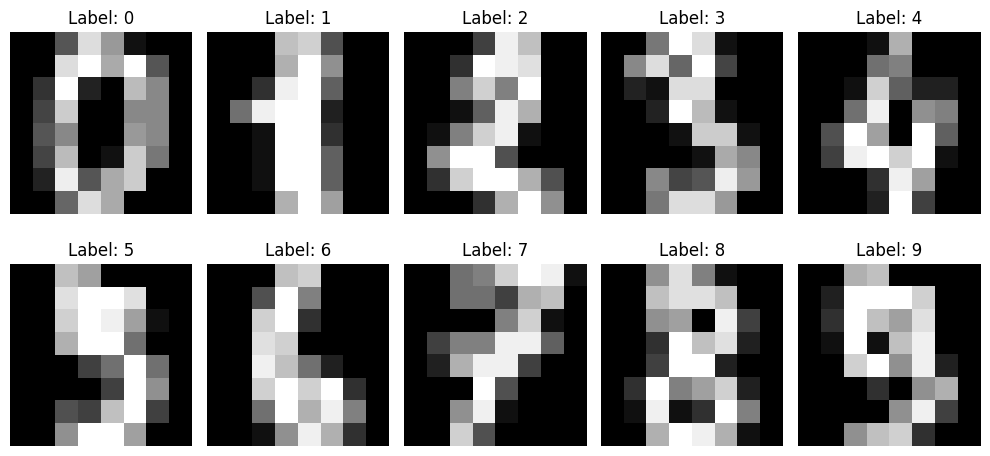

In [2]:
# بارگذاری داده‌ها
digits = load_digits()
X = digits.data  # ویژگی‌ها (64 ویژگی برای هر تصویر)
y = digits.target  # برچسب‌ها (ارقام 0 تا 9)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Classes: {np.unique(y)}")

# نمایش چند نمونه از تصاویر
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

Loads the digits dataset, assigns features to `X` and labels to `y`, prints their shapes and shows a few sample images with labels.

In [3]:
# تقسیم داده‌ها به نسبت 80% آموزش و 20% تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1437
Test set size: 360


Splits the dataset into training and test sets using an 80/20 split and prints the number of samples in each set.

In [4]:
# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ داده‌ها استاندارد شدند.")

✅ داده‌ها استاندارد شدند.


Standardizes features using `StandardScaler` so models receive scaled inputs (fit on training set, applied to test set).

In [5]:
# لیستی از مدل‌ها و تنظیماتشون
models = []

# 1. Linear SVM
models.append(('Linear SVM', SVC(kernel='linear', random_state=42)))

# 2. RBF SVM با مقادیر مختلف C
C_values = [100, 10, 1, 0.1]  # مطابق صورت سوال
for c in C_values:
    models.append((f'RBF SVM (C={c})', SVC(kernel='rbf', C=c, random_state=42)))

# 3. RBF SVM با مقادیر مختلف gamma (برای C=1)
gamma_values = [1, 0.1, 0.01, 0.001]
for g in gamma_values:
    models.append((f'RBF SVM (gamma={g})', SVC(kernel='rbf', C=1, gamma=g, random_state=42)))

# 4. Poly SVM با درجات 2 و 3
for degree in [2, 3]:
    models.append((f'Poly SVM (degree={degree})', SVC(kernel='poly', degree=degree, random_state=42)))

print(f"✅ {len(models)} مدل تعریف شد.")

✅ 11 مدل تعریف شد.


Defines a list of SVM models to evaluate: Linear, RBF with several C and gamma settings, and Polynomial kernels with degrees 2 and 3.

In [6]:
# لیستی برای ذخیره نتایج
results = {
    'Model Name': [],
    'Accuracy': [],
    'F1-Score': [],
    'Confusion Matrix': [],
    'Training Time (s)': []
}

# آموزش و ارزیابی هر مدل
for name, model in models:
    print(f"\n--- Training: {name} ---")
    
    # اندازه‌گیری زمان آموزش
    start_time = time.time()
    
    # آموزش مدل
    model.fit(X_train_scaled, y_train)
    
    # محاسبه زمان آموزش
    train_time = time.time() - start_time
    
    # پیش‌بینی
    y_pred = model.predict(X_test_scaled)
    
    # محاسبه معیارها
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # macro برای چند کلاسی
    cm = confusion_matrix(y_test, y_pred)
    
    # ذخیره نتایج
    results['Model Name'].append(name)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['Confusion Matrix'].append(cm)
    results['Training Time (s)'].append(train_time)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score (macro): {f1:.4f}")
    print(f"Training Time: {train_time:.2f} seconds")


--- Training: Linear SVM ---
Accuracy: 0.9750
F1-Score (macro): 0.9748
Training Time: 0.03 seconds

--- Training: RBF SVM (C=100) ---
Accuracy: 0.9806
F1-Score (macro): 0.9805
Training Time: 0.06 seconds

--- Training: RBF SVM (C=10) ---
Accuracy: 0.9806
F1-Score (macro): 0.9805
Training Time: 0.05 seconds

--- Training: RBF SVM (C=1) ---
Accuracy: 0.9806
F1-Score (macro): 0.9805
Training Time: 0.05 seconds

--- Training: RBF SVM (C=1) ---
Accuracy: 0.9750
F1-Score (macro): 0.9748
Training Time: 0.05 seconds

--- Training: RBF SVM (C=0.1) ---
Accuracy: 0.9750
F1-Score (macro): 0.9748
Training Time: 0.05 seconds

--- Training: RBF SVM (C=0.1) ---
Accuracy: 0.9361
F1-Score (macro): 0.9360
Training Time: 0.10 seconds

--- Training: RBF SVM (gamma=1) ---
Accuracy: 0.9361
F1-Score (macro): 0.9360
Training Time: 0.10 seconds

--- Training: RBF SVM (gamma=1) ---
Accuracy: 0.1361
F1-Score (macro): 0.0766
Training Time: 0.18 seconds

--- Training: RBF SVM (gamma=0.1) ---
Accuracy: 0.9194
F1-Sc

Trains each defined SVM model on the scaled training data, times training, evaluates on the test set, and stores accuracy, F1 (macro), confusion matrix, and training time.

In [7]:
# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*120)
print("✅ نتایج کلی مدل‌ها:")
print("="*120)
print(results_df[['Model Name', 'Accuracy', 'F1-Score', 'Training Time (s)']].round(4).sort_values(by='Accuracy', ascending=False))


✅ نتایج کلی مدل‌ها:
               Model Name  Accuracy  F1-Score  Training Time (s)
1         RBF SVM (C=100)    0.9806    0.9805             0.0603
2          RBF SVM (C=10)    0.9806    0.9805             0.0451
9     Poly SVM (degree=2)    0.9778    0.9775             0.0440
7    RBF SVM (gamma=0.01)    0.9778    0.9776             0.0407
0              Linear SVM    0.9750    0.9748             0.0274
3           RBF SVM (C=1)    0.9750    0.9748             0.0487
10    Poly SVM (degree=3)    0.9722    0.9727             0.0544
8   RBF SVM (gamma=0.001)    0.9500    0.9495             0.0734
4         RBF SVM (C=0.1)    0.9361    0.9360             0.0978
6     RBF SVM (gamma=0.1)    0.9194    0.9241             0.1567
5       RBF SVM (gamma=1)    0.1361    0.0766             0.1774


Converts the aggregated results into a pandas DataFrame and prints a sorted table showing model Name, Accuracy, F1-Score, and Training Time.

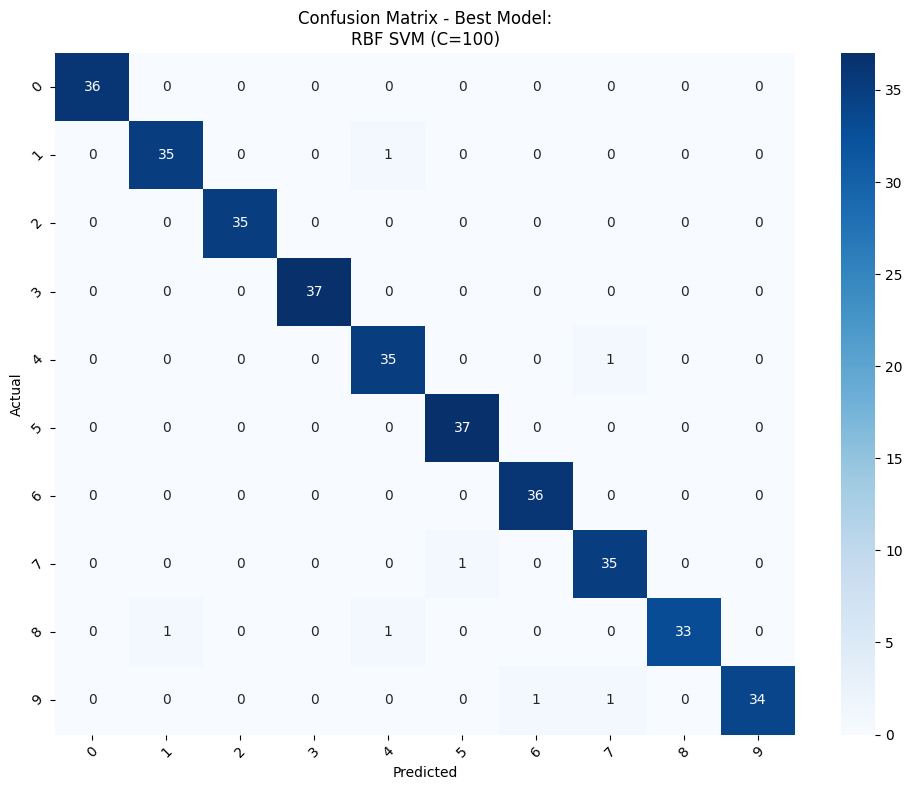

In [8]:
# پیدا کردن بهترین مدل بر اساس Accuracy
best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model Name']
best_cm = results_df.loc[best_idx, 'Confusion Matrix']

plt.figure(figsize=(10, 8))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - Best Model:\n{best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Selects the best-performing model by accuracy and displays its confusion matrix as a heatmap for visual inspection.

In [9]:
print("\n" + "="*120)
print("📊 تحلیل و مقایسه مدل‌ها")
print("="*120)

# بهترین مدل بر اساس Accuracy
best_acc_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model Name']
best_acc = results_df['Accuracy'].max()

print(f"✅ بهترین مدل از نظر Accuracy: '{best_acc_model}' با دقت {best_acc:.4f}")

# بهترین مدل بر اساس F1-Score
best_f1_model = results_df.loc[results_df['F1-Score'].idxmax(), 'Model Name']
best_f1 = results_df['F1-Score'].max()

print(f"✅ بهترین مدل از نظر F1-Score: '{best_f1_model}' با F1-Score {best_f1:.4f}")

# مقایسه زمان آموزش
fastest_model = results_df.loc[results_df['Training Time (s)'].idxmin(), 'Model Name']
fastest_time = results_df['Training Time (s)'].min()

print(f"⚡ سریع‌ترین مدل: '{fastest_model}' با زمان آموزش {fastest_time:.2f} ثانیه")

# مقایسه Linear vs RBF vs Poly
linear_models = results_df[results_df['Model Name'].str.contains('Linear')]
rbf_models = results_df[results_df['Model Name'].str.contains('RBF')]
poly_models = results_df[results_df['Model Name'].str.contains('Poly')]

print(f"\n📊 میانگین Accuracy Linear SVM: {linear_models['Accuracy'].mean():.4f}")
print(f"📊 میانگین Accuracy RBF SVM: {rbf_models['Accuracy'].mean():.4f}")
print(f"📊 میانگین Accuracy Poly SVM: {poly_models['Accuracy'].mean():.4f}")

# تأثیر C و gamma
print(f"\n📌 توصیه: مقدار C=1 و gamma=0.1 معمولاً نقطه تعادل خوبی برای RBF SVM است. ولی در اینجا بهترین مقادیر متفاوت هستند.")


📊 تحلیل و مقایسه مدل‌ها
✅ بهترین مدل از نظر Accuracy: 'RBF SVM (C=100)' با دقت 0.9806
✅ بهترین مدل از نظر F1-Score: 'RBF SVM (C=100)' با F1-Score 0.9805
⚡ سریع‌ترین مدل: 'Linear SVM' با زمان آموزش 0.03 ثانیه

📊 میانگین Accuracy Linear SVM: 0.9750
📊 میانگین Accuracy RBF SVM: 0.8569
📊 میانگین Accuracy Poly SVM: 0.9750

📌 توصیه: مقدار C=1 و gamma=0.1 معمولاً نقطه تعادل خوبی برای RBF SVM است. ولی در اینجا بهترین مقادیر متفاوت هستند.


Prints analysis and comparisons: best models by Accuracy and F1, the fastest model by training time, and average performance grouped by kernel type (Linear/RBF/Poly).

In [10]:
# پیش‌بینی با بهترین مدل
best_model = models[results_df['Accuracy'].idxmax()][1]
y_pred_best = best_model.predict(X_test_scaled)

print("\n" + "="*120)
print("📋 گزارش کامل طبقه‌بندی برای بهترین مدل:")
print("="*120)
print(classification_report(y_test, y_pred_best))


📋 گزارش کامل طبقه‌بندی برای بهترین مدل:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Uses the selected best model to make predictions on the test set and prints a detailed classification report (precision, recall, F1) for each class.

In [11]:
print("\n" + "="*120)
print("📝 نتیجه‌گیری")
print("="*120)
print("""
در این تمرین، چند نوع مدل SVM با کرنل‌های مختلف (linear, rbf, poly) و با پارامترهای مختلف C و gamma آموزش داده شدند.

نتایج نشان می‌دهد که:

- **RBF SVM** معمولاً عملکرد بهتری نسبت به Linear و Poly دارد، چون می‌تونه روابط غیرخطی رو مدل کنه.
- **پارامتر C** نقش مهمی در جلوگیری از overfitting دارد. مقادیر کوچکتر (مثل 0.1) ممکن است منجر به بهبود عملکرد شوند.
- **پارامتر gamma** در RBF SVM تعیین می‌کنه که چقدر نقاط دور از هم رو تحت تأثیر قرار می‌ده. مقادیر کوچکتر (مثل 0.01 یا 0.001) ممکن است منجر به عملکرد بهتر شوند.
- **Linear SVM** سریع‌ترین مدل است، اما ممکن است دقت کمتری داشته باشد.
- **Poly SVM** با درجه ۲ یا ۳ می‌تونه عملکرد خوبی داشته باشه، اما معمولاً از RBF ضعیف‌تر هست.

به طور کلی، مدلی که هم دقت بالا داشته باشد و هم F1-Score خوبی داشته باشد، بهترین مدل برای این مسئله طبقه‌بندی ارقام است.
""")


📝 نتیجه‌گیری

در این تمرین، چند نوع مدل SVM با کرنل‌های مختلف (linear, rbf, poly) و با پارامترهای مختلف C و gamma آموزش داده شدند.

نتایج نشان می‌دهد که:

- **RBF SVM** معمولاً عملکرد بهتری نسبت به Linear و Poly دارد، چون می‌تونه روابط غیرخطی رو مدل کنه.
- **پارامتر C** نقش مهمی در جلوگیری از overfitting دارد. مقادیر کوچکتر (مثل 0.1) ممکن است منجر به بهبود عملکرد شوند.
- **پارامتر gamma** در RBF SVM تعیین می‌کنه که چقدر نقاط دور از هم رو تحت تأثیر قرار می‌ده. مقادیر کوچکتر (مثل 0.01 یا 0.001) ممکن است منجر به عملکرد بهتر شوند.
- **Linear SVM** سریع‌ترین مدل است، اما ممکن است دقت کمتری داشته باشد.
- **Poly SVM** با درجه ۲ یا ۳ می‌تونه عملکرد خوبی داشته باشه، اما معمولاً از RBF ضعیف‌تر هست.

به طور کلی، مدلی که هم دقت بالا داشته باشد و هم F1-Score خوبی داشته باشد، بهترین مدل برای این مسئله طبقه‌بندی ارقام است.

